### Load the required files

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

In [17]:
# Option to see all the columns?
pd.set_option('display.max_columns', None)

### Load the dataset. Refer to README.md for the same

In [18]:
# get the dataset_mount_folder with points to the mount_point (refer to README.md) file.
df = pd.read_csv(os.path.join(dataset_mount_folder, 'labels.csv'))
df.shape

(464872, 27)

In [19]:
# total number of scan folders/children
scans_path = os.path.join(dataset_mount_folder, 'scans')
scans_f = os.listdir(scans_path)
print(f"Total number of scan folders/ children: {len(scans_f)}")

Total number of scan folders/ children: 14122


In [11]:
df.head()

,scan_id,scan_step,scan_version,height,weight,muac,device_model,person_id,age,sex,depth_artifact_id,rgb_artifact_id,depth_file_path,rgb_file_path,seg_file_path,order_number,pose_data,no_of_person,bbox_coordinates,bbox_coordinates_flat,device_pose,raw_header,angle,distance_to_child,depthmap_validity,overlap,pickle_file_path
0,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00038046-1662-11ee-b688-5b407fafa206,000955b6-1662-11ee-b6a1-b7634aba3b47,1688032018064/ff0bb284-8205-4747-bf16-d5071bb8...,1688032021703/0ec66c1a-f869-4c40-9d79-0883db4a...,1688463655675/a3c544fd-d3ca-4a24-ad01-14855ddd...,23.0,"{'Pose Scores': '0.8850690126419067', 'Pose Re...",1.0,"[[123.1734619140625, 54.69906234741211], [336....","[123.1734619140625, 54.69906234741211, 336.760...","[-0.660031663389195, -0.7512322946491309, 0.00...",240x180_0.001_7_-0.29982573_0.6649186_0.622815...,-41.188780,0.403,0.872397,93.430657,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...
1,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006979a-1662-11ee-b695-6b5e4df5c37d,000cd682-1662-11ee-b6ae-1ffa62492195,1688032019704/d207a578-4155-4fa2-8766-37914ab5...,1688032032193/af2ff7e7-764b-4125-bf62-40fed084...,1688473125243/4c68537a-b62f-4d22-976c-b5f7736c...,10.0,"{'Pose Scores': '0.9516599178314209', 'Pose Re...",1.0,"[[118.74262237548828, 7.9830780029296875], [35...","[118.74262237548828, 7.9830780029296875, 355.9...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.30499345_0.67262733_0.62170...,-42.629771,0.348,0.922401,82.714055,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...
2,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,000752d4-1662-11ee-b698-cb2375695339,000d6f66-1662-11ee-b6b1-a3c5c5cf33f7,1688032020026/6f7ce2e7-604a-4406-af8b-1df08b64...,1688032032756/01985e7f-04a5-4a73-9da5-ed46ade2...,1688473125664/7b520309-bd34-42ed-8bca-39cc9a7b...,13.0,"{'Pose Scores': '0.9465732574462891', 'Pose Re...",1.0,"[[101.69088745117188, 38.712276458740234], [33...","[101.69088745117188, 38.712276458740234, 331.8...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.3211362_0.6721769_0.6131039...,-40.944694,0.375,0.918329,86.340641,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...
3,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006d994-1662-11ee-b696-9338132ef592,000d09f4-1662-11ee-b6af-a3f4ea51be70,1688032019806/461168aa-a562-4516-915a-3cfd204e...,1688032032395/41d8874a-03cb-4732-b60d-21fd3553...,1688474219042/76055fc7-ea95-475b-88cc-fe35247d...,11.0,"{'Pose Scores': '0.9481731653213501', 'Pose Re...",1.0,"[[119.50724029541016, 8.51676082611084], [352....","[119.50724029541016, 8.51676082611084, 352.828...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.30764356_0.67201084_0.62068...,-42.311668,0.341,0.915284,82.847896,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...
4,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00084996-1662-11ee-b69c-6be90b558554,000e39b4-1662-11ee-b6b5-d7bb0bde34de,1688032020698/bb38b041-489f-4531-93fd-351892dc...,1688032033403/4956b6f6-3e2a-4dff-ba28-e68d362f...,1688537283760/a9219152-e946-4eac-9cf1-4496d65d...,17.0,"{'Pose Scores': '0.9444122314453125', 'Pose Re...",1.0,"[[106.0658950805664, 21.79958724975586], [340....","[106.0658950805664, 21.79958724975586, 340.408...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.31882268_0.6687906_0.618405...,-41.307646,0.377,0.921287,83.934426,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...


### This section checks for the rows with "NAN" values and eliminates them

In [12]:
# check if "age"/other cols has null values
df['age'].isna().sum(), df['scan_id'].isna().sum()

(688, 688)

In [13]:
# get the list of null values.
null_indices = df.index[df["age"].isnull()].tolist()

In [14]:
# sample to check if all the cols have NULL values.
df.iloc[1072]

scan_id                  NaN
scan_step                NaN
scan_version             NaN
height                   NaN
weight                   NaN
muac                     NaN
device_model             NaN
person_id                NaN
age                      NaN
sex                      NaN
depth_artifact_id        NaN
rgb_artifact_id          NaN
depth_file_path          NaN
rgb_file_path            NaN
seg_file_path            NaN
order_number             NaN
pose_data                NaN
no_of_person             NaN
bbox_coordinates         NaN
bbox_coordinates_flat    NaN
device_pose              NaN
raw_header               NaN
angle                    NaN
distance_to_child        NaN
depthmap_validity        NaN
overlap                  NaN
pickle_file_path         NaN
Name: 1072, dtype: object

In [31]:
# After removing "NULL" values from all cols.
# df_adjusted in the dataframe with no "NAN" values.
df_adjusted = df.dropna()
df_adjusted.shape


(464150, 27)

In [32]:
# add age in Years
df_adjusted['Years'] = df_adjusted.apply(convert_age_from_days_to_years, axis=1)
df_adjusted.head()

/tmp/ipykernel_3712799/687061115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['Years'] = df_adjusted.apply(convert_age_from_days_to_years, axis=1)


,scan_id,scan_step,scan_version,height,weight,muac,device_model,person_id,age,sex,depth_artifact_id,rgb_artifact_id,depth_file_path,rgb_file_path,seg_file_path,order_number,pose_data,no_of_person,bbox_coordinates,bbox_coordinates_flat,device_pose,raw_header,angle,distance_to_child,depthmap_validity,overlap,pickle_file_path,Years
0,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00038046-1662-11ee-b688-5b407fafa206,000955b6-1662-11ee-b6a1-b7634aba3b47,1688032018064/ff0bb284-8205-4747-bf16-d5071bb8...,1688032021703/0ec66c1a-f869-4c40-9d79-0883db4a...,1688463655675/a3c544fd-d3ca-4a24-ad01-14855ddd...,23.0,"{'Pose Scores': '0.8850690126419067', 'Pose Re...",1.0,"[[123.1734619140625, 54.69906234741211], [336....","[123.1734619140625, 54.69906234741211, 336.760...","[-0.660031663389195, -0.7512322946491309, 0.00...",240x180_0.001_7_-0.29982573_0.6649186_0.622815...,-41.188780,0.403,0.872397,93.430657,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4
1,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006979a-1662-11ee-b695-6b5e4df5c37d,000cd682-1662-11ee-b6ae-1ffa62492195,1688032019704/d207a578-4155-4fa2-8766-37914ab5...,1688032032193/af2ff7e7-764b-4125-bf62-40fed084...,1688473125243/4c68537a-b62f-4d22-976c-b5f7736c...,10.0,"{'Pose Scores': '0.9516599178314209', 'Pose Re...",1.0,"[[118.74262237548828, 7.9830780029296875], [35...","[118.74262237548828, 7.9830780029296875, 355.9...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.30499345_0.67262733_0.62170...,-42.629771,0.348,0.922401,82.714055,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4
2,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,000752d4-1662-11ee-b698-cb2375695339,000d6f66-1662-11ee-b6b1-a3c5c5cf33f7,1688032020026/6f7ce2e7-604a-4406-af8b-1df08b64...,1688032032756/01985e7f-04a5-4a73-9da5-ed46ade2...,1688473125664/7b520309-bd34-42ed-8bca-39cc9a7b...,13.0,"{'Pose Scores': '0.9465732574462891', 'Pose Re...",1.0,"[[101.69088745117188, 38.712276458740234], [33...","[101.69088745117188, 38.712276458740234, 331.8...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.3211362_0.6721769_0.6131039...,-40.944694,0.375,0.918329,86.340641,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4
3,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006d994-1662-11ee-b696-9338132ef592,000d09f4-1662-11ee-b6af-a3f4ea51be70,1688032019806/461168aa-a562-4516-915a-3cfd204e...,1688032032395/41d8874a-03cb-4732-b60d-21fd3553...,1688474219042/76055fc7-ea95-475b-88cc-fe35247d...,11.0,"{'Pose Scores': '0.9481731653213501', 'Pose Re...",1.0,"[[119.50724029541016, 8.51676082611084], [352....","[119.50724029541016, 8.51676082611084, 352.828...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.30764356_0.67201084_0.62068...,-42.311668,0.341,0.915284,82.847896,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4
4,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00084996-1662-11ee-b69c-6be90b558554,000e39b4-1662-11ee-b6b5-d7bb0bde34de,1688032020698/bb38b041-489f-4531-93fd-351892dc...,1688032033403/4956b6f6-3e2a-4dff-ba28-e68d362f...,1688537283760/a9219152-e946-4eac-9cf1-4496d65d...,17.0,"{'Pose Scores': '0.9444122314453125', 'Pose Re...",1.0,"[[106.0658950805664, 21.79958724975586], [340....","[106.0658950805664, 21.79958724975586, 340.408...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.31882268_0.6687906_0.618405...,-41.307646,0.377,0.921287,83.934426,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4


In [33]:
# Get the pose_score from pose_data column
df_adjusted['pose_score'] = df_adjusted['pose_data'].apply(lambda x: eval(x).get('Pose Scores'))
df_adjusted.head()

/tmp/ipykernel_3712799/734003200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['pose_score'] = df_adjusted['pose_data'].apply(lambda x: eval(x).get('Pose Scores'))


,scan_id,scan_step,scan_version,height,weight,muac,device_model,person_id,age,sex,depth_artifact_id,rgb_artifact_id,depth_file_path,rgb_file_path,seg_file_path,order_number,pose_data,no_of_person,bbox_coordinates,bbox_coordinates_flat,device_pose,raw_header,angle,distance_to_child,depthmap_validity,overlap,pickle_file_path,Years,pose_score
0,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00038046-1662-11ee-b688-5b407fafa206,000955b6-1662-11ee-b6a1-b7634aba3b47,1688032018064/ff0bb284-8205-4747-bf16-d5071bb8...,1688032021703/0ec66c1a-f869-4c40-9d79-0883db4a...,1688463655675/a3c544fd-d3ca-4a24-ad01-14855ddd...,23.0,"{'Pose Scores': '0.8850690126419067', 'Pose Re...",1.0,"[[123.1734619140625, 54.69906234741211], [336....","[123.1734619140625, 54.69906234741211, 336.760...","[-0.660031663389195, -0.7512322946491309, 0.00...",240x180_0.001_7_-0.29982573_0.6649186_0.622815...,-41.188780,0.403,0.872397,93.430657,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.8850690126419067
1,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006979a-1662-11ee-b695-6b5e4df5c37d,000cd682-1662-11ee-b6ae-1ffa62492195,1688032019704/d207a578-4155-4fa2-8766-37914ab5...,1688032032193/af2ff7e7-764b-4125-bf62-40fed084...,1688473125243/4c68537a-b62f-4d22-976c-b5f7736c...,10.0,"{'Pose Scores': '0.9516599178314209', 'Pose Re...",1.0,"[[118.74262237548828, 7.9830780029296875], [35...","[118.74262237548828, 7.9830780029296875, 355.9...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.30499345_0.67262733_0.62170...,-42.629771,0.348,0.922401,82.714055,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.9516599178314209
2,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,000752d4-1662-11ee-b698-cb2375695339,000d6f66-1662-11ee-b6b1-a3c5c5cf33f7,1688032020026/6f7ce2e7-604a-4406-af8b-1df08b64...,1688032032756/01985e7f-04a5-4a73-9da5-ed46ade2...,1688473125664/7b520309-bd34-42ed-8bca-39cc9a7b...,13.0,"{'Pose Scores': '0.9465732574462891', 'Pose Re...",1.0,"[[101.69088745117188, 38.712276458740234], [33...","[101.69088745117188, 38.712276458740234, 331.8...","[-0.6554365387659927, -0.7541766936199997, -0....",240x180_0.001_7_-0.3211362_0.6721769_0.6131039...,-40.944694,0.375,0.918329,86.340641,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.9465732574462891
3,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,0006d994-1662-11ee-b696-9338132ef592,000d09f4-1662-11ee-b6af-a3f4ea51be70,1688032019806/461168aa-a562-4516-915a-3cfd204e...,1688032032395/41d8874a-03cb-4732-b60d-21fd3553...,1688474219042/76055fc7-ea95-475b-88cc-fe35247d...,11.0,"{'Pose Scores': '0.9481731653213501', 'Pose Re...",1.0,"[[119.50724029541016, 8.51676082611084], [352....","[119.50724029541016, 8.51676082611084, 352.828...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.30764356_0.67201084_0.62068...,-42.311668,0.341,0.915284,82.847896,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.9481731653213501
4,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.0,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00084996-1662-11ee-b69c-6be90b558554,000e39b4-1662-11ee-b6b5-d7bb0bde34de,1688032020698/bb38b041-489f-4531-93fd-351892dc...,1688032033403/4956b6f6-3e2a-4dff-ba28-e68d362f...,1688537283760/a9219152-e946-4eac-9cf1-4496d65d...,17.0,"{'Pose Scores': '0.9444122314453125', 'Pose Re...",1.0,"[[106.0658950805664, 21.79958724975586], [340....","[106.0658950805664, 21.79958724975586, 340.408...","[-0.6785375397857386, -0.7338535381632023, -0....",240x180_0.001_7_-0.31882268_0.6687906_0.618405...,-41.307646,0.377,0.921287,83.934426,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.9444122314453125


In [34]:
# Total number of artifacts
print(f"Total Number of artifacts: {len(df_adjusted['depth_artifact_id'])}")
print(f"Total Number of scans: {len(df_adjusted.groupby('scan_id'))}")

Total Number of artifacts: 464150
Total Number of scans: 35286


In [35]:
# sample rgbds_file_path
sample_file = df_adjusted['rgb_file_path'][0]
print(sample_file)

1688032021703/0ec66c1a-f869-4c40-9d79-0883db4af530


### Sample File

In [36]:
# sample scan
sample_scan = scans_f[0]
print(f'sample_scan: {sample_scan}')
print(os.listdir(scans_path + '/' + sample_scan))
f = scans_path + '/' + sample_scan + '/' + '100'
# print(f"sample filepath: {f}")
# print(os.listdir(f))

f_path = f + '/' + os.listdir(f)[0]
# print(f_path)

sample_scan: 0004171c-1839-11ee-9f35-af14858a8e54
['100', '101', '102']


In [37]:
depthmaps, target = pickle.load(open(f_path, "rb"))

In [38]:
# depthmaps is a list of 3 npz arrays (Depthmap, RGB, segment)
depth, rgb, segment = depthmaps
# depthmaps[0].shape, depthmaps[1].shape, depthmaps[2].shape
print(f"Shape of Depthmap: {depth.shape}, RGB: {rgb.shape}, segment map: {segment.shape}")

Shape of Depthmap: (240, 180, 1), RGB: (240, 180, 3), segment map: (240, 180, 1)


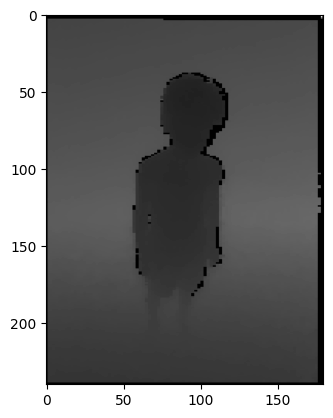

In [39]:
_ = plt.imshow(np.squeeze(depth), cmap='gray')
plt.show()

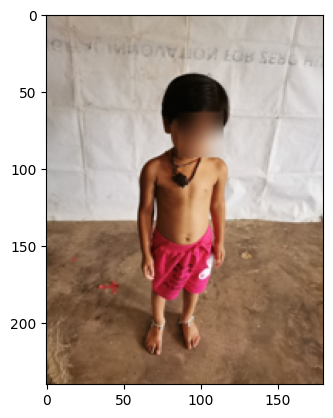

In [40]:
_ = plt.imshow(np.squeeze(rgb), cmap='gray')
plt.show()

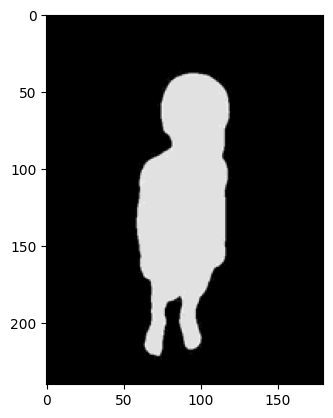

In [41]:
_ = plt.imshow(np.squeeze(segment), cmap='gray')
plt.show()

In [42]:
print(target)

{'scan_id': '03e12c94-1839-11ee-a236-7f85efe5a69b', 'scan_step': 100, 'scan_version': 'v1.2.1', 'height': 90.0, 'weight': 10.85, 'muac': 13.6, 'device_model': 'HUAWEI VOG-L29', 'person_id': '0004171c-1839-11ee-9f35-af14858a8e54', 'age': 993, 'sex': 'female', 'depth_artifact_id': '03e1a4a8-1839-11ee-a237-8f437c52e181', 'rgb_artifact_id': '03e3556e-1839-11ee-a240-3f66a071477c', 'depth_file_path': '1688234296946/e2808a34-6bb4-4228-83a9-199135392a2b', 'rgb_file_path': '1688234302845/3f2825dc-0e4c-40ae-be53-c5a870e2a4aa', 'seg_file_path': '1688724616598/b5aca137-e0b8-49b2-b1f2-b61b20501d22', 'order_number': 1, 'pose_data': {'Pose Scores': '0.9579015374183655', 'Pose Results': "{'bbox_coordinates': [[351.1843566894531, 224.70619201660156], [723.978271484375, 1357.4219970703125]], 'bbox_confidence_score': [0.9991520643234253], 'key_points_coordinate': [{'nose': {'x': 492.3987731933594, 'y': 494.4847412109375}}, {'left_eye': {'x': 462.9009704589844, 'y': 450.238037109375}}, {'right_eye': {'x':

## Analysis

In [43]:
print("Total no. of artifacts:", len(df_adjusted))
unique_scan_ids = df_adjusted.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = df_adjusted.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 464150
Total no. of unique scan ids: 35286
Total no. of unique person ids: 14119


HUAWEI VOG-L29    464150
Name: device_model, dtype: int64


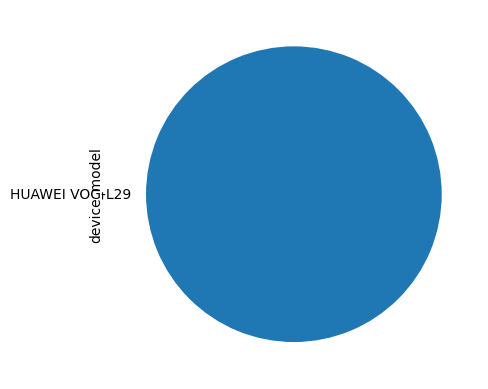

In [44]:
print(df_adjusted['device_model'].value_counts())
_ = df_adjusted['device_model'].value_counts().plot(kind='pie')

v1.2.0    178395
v0.8      173736
v1.2.1    107902
v0.9        4117
Name: scan_version, dtype: int64


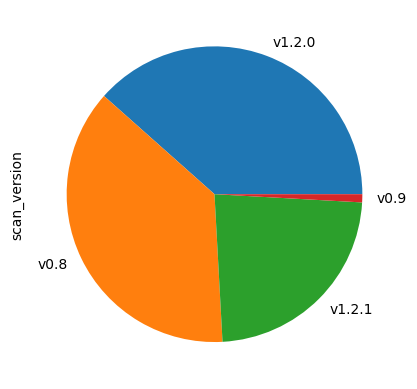

In [45]:
print(df_adjusted['scan_version'].value_counts())
_ = df_adjusted['scan_version'].value_counts().plot(kind='pie')

0    1483
1    3041
2    2917
3    3245
4    3415
5      18
Name: Years, dtype: int64


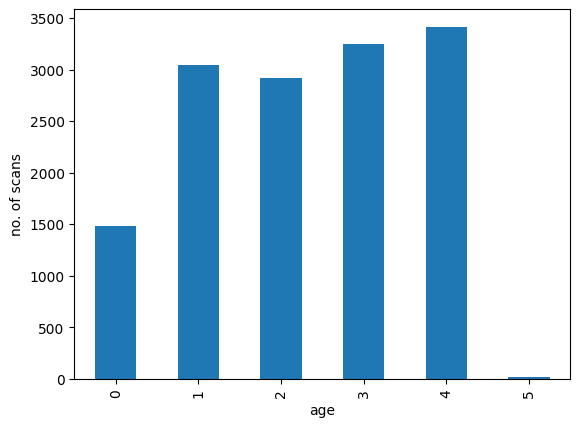

In [46]:
draw_age_distribution(unique_person_ids)

0    2619
1    6449
2    7805
3    8875
4    9490
5      48
Name: Years, dtype: int64


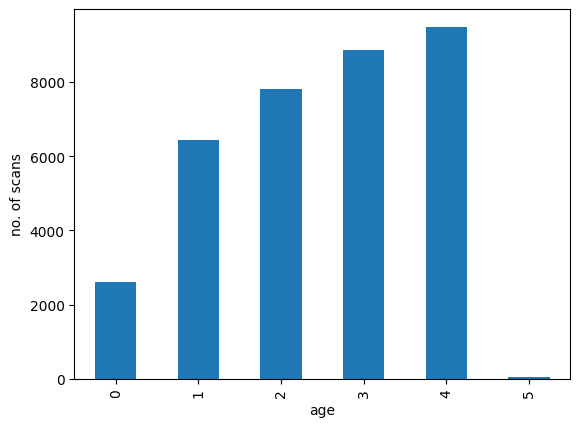

In [47]:
draw_age_distribution(unique_scan_ids)

101.0    281014
102.0     96740
100.0     46274
202.0     27260
200.0     12862
Name: scan_step, dtype: int64


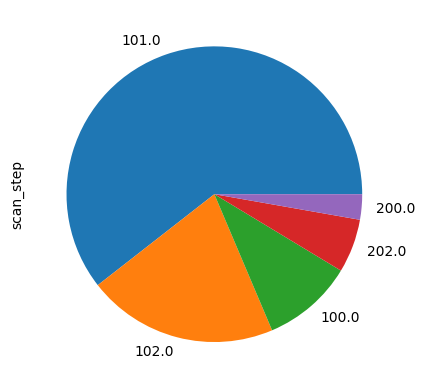

In [48]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df_adjusted['scan_step'].value_counts())
_ = df_adjusted['scan_step'].value_counts().plot(kind='pie')

In [49]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(df_adjusted, scan_type_colname)

2023-07-21 07:09:15,365 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/rbanka2/code/Users/rbanka/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
101.0,2510,31946,72369,83883,89838
102.0,933,10915,24802,29014,30914
100.0,417,4310,10550,14215,16683
202.0,11695,14613,704,178,70
200.0,5628,6753,367,74,40


### Analysis based on  Age (>2 and <2)

In [50]:
# get dataframe with age > 2
df_gt2 = df_adjusted[df_adjusted['age']>=731]
print(f"Total Number of artifacts for age > 2: {len(df_gt2['depth_artifact_id'])}")
print(f"Total Number of scans for age > 2: {len(df_gt2.groupby('scan_id'))}")

# get dataframe with age < 2
df_lt2 = df_adjusted[~(df_adjusted['age'] >= 731)]
print(f"Total Number of artifacts for age < 2: {len(df_lt2['depth_artifact_id'])}")
print(f"Total Number of scans for age < 2: {len(df_lt2.groupby('scan_id'))}")

Total Number of artifacts for age > 2: 374013
Total Number of scans for age > 2: 26184
Total Number of artifacts for age < 2: 90137
Total Number of scans for age < 2: 9102


#### Scan type for age > 2

101.0    246303
102.0     84800
100.0     41507
202.0       931
200.0       472
Name: scan_step, dtype: int64


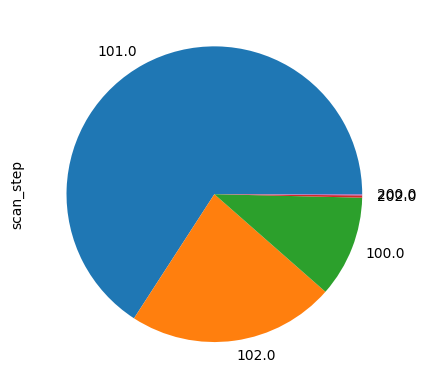

In [51]:
## keys for different scan type and their distribution in dataframe with "age" > 2
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df_gt2['scan_step'].value_counts())
_ = df_gt2['scan_step'].value_counts().plot(kind='pie')


#### scan type for age < 2


101.0    34711
202.0    26329
200.0    12390
102.0    11940
100.0     4767
Name: scan_step, dtype: int64


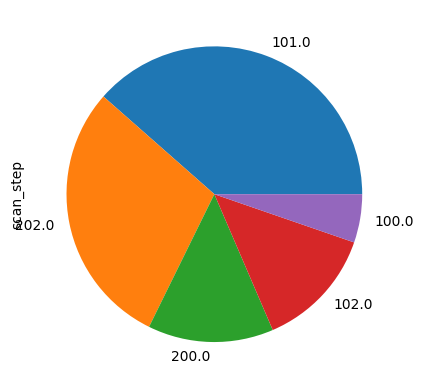

In [52]:
## keys for different scan type and their distribution in dataframe with "age" < 2
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df_lt2['scan_step'].value_counts())
_ = df_lt2['scan_step'].value_counts().plot(kind='pie')

In [53]:
df_gt2['pose_score'] = df_gt2['pose_score'].apply(lambda x: float(x))
df_gt2_new = df_gt2[(df_gt2['pose_score'] > 0.90) & (df_gt2['no_of_person'] == 1)]
print(f"Total Number of artifacts for age > 2, pose_score > 0.90, no_of_person == 1: {len(df_gt2_new['depth_artifact_id'])}")
print(f"Total Number of scans for age > 2, pose_score > 0.90, no_of_person == 1: {len(df_gt2_new.groupby('scan_id'))}")

/tmp/ipykernel_3712799/3593772743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt2['pose_score'] = df_gt2['pose_score'].apply(lambda x: float(x))


Total Number of artifacts for age > 2, pose_score > 0.90, no_of_person == 1: 165512
Total Number of scans for age > 2, pose_score > 0.90, no_of_person == 1: 18851


### Distribution of height, weight and age against each other

In [54]:
unique_scan_ids.head()

,scan_id,scan_step,scan_version,height,weight,muac,device_model,person_id,age,sex,depth_artifact_id,rgb_artifact_id,depth_file_path,rgb_file_path,seg_file_path,order_number,pose_data,no_of_person,bbox_coordinates,bbox_coordinates_flat,device_pose,raw_header,angle,distance_to_child,depthmap_validity,overlap,pickle_file_path,Years,pose_score
0,0001d9da-1662-11ee-b685-87f16eb24c79,101.0,v0.8,100.9,16.00,14.6,HUAWEI VOG-L29,ffff75f0-1661-11ee-b683-d7da187c6d6f,1651.0,male,00038046-1662-11ee-b688-5b407fafa206,000955b6-1662-11ee-b6a1-b7634aba3b47,1688032018064/ff0bb284-8205-4747-bf16-d5071bb8...,1688032021703/0ec66c1a-f869-4c40-9d79-0883db4a...,1688463655675/a3c544fd-d3ca-4a24-ad01-14855ddd...,23.0,"{'Pose Scores': '0.8850690126419067', 'Pose Re...",1.0,"[[123.1734619140625, 54.69906234741211], [336....","[123.1734619140625, 54.69906234741211, 336.760...","[-0.660031663389195, -0.7512322946491309, 0.00...",240x180_0.001_7_-0.29982573_0.6649186_0.622815...,-41.188780,0.403,0.872397,93.430657,scans/ffff75f0-1661-11ee-b683-d7da187c6d6f/101...,4,0.8850690126419067
26,0001f720-1717-11ee-b1c1-d32111c62689,101.0,v1.2.0,81.3,9.75,14.0,HUAWEI VOG-L29,ffffaa6a-1716-11ee-b1bf-b334fa7dd17a,836.0,female,0004e188-1717-11ee-b1c6-53b33e8fccd1,000a3c6e-1717-11ee-b1e0-dbd3da82acdb,1688109736125/b5c765c0-9461-4729-acf2-92b2af0a...,1688109741739/7a6e7f34-bb2a-4a6e-b542-a0d50801...,1688465761359/a437752e-0789-492d-a2cb-728e8e15...,5.0,"{'Pose Scores': '0.92992157', 'Pose Results': ...",1.0,"[[378.03104, 331.1907], [791.5804, 1268.4048]]","[378.03104, 331.1907, 791.5804, 1268.4048]","[-0.6056877275469373, -0.7577698506514057, -0....",240x180_0.001_7_-0.41310683_0.68696326_0.57534...,-41.011473,0.566,0.869867,100.000000,scans/ffffaa6a-1716-11ee-b1bf-b334fa7dd17a/101...,2,0.92992157
52,00066350-1839-11ee-9f37-6b272ee4ca97,101.0,v1.2.1,90.0,10.85,13.6,HUAWEI VOG-L29,0004171c-1839-11ee-9f35-af14858a8e54,993.0,female,0007675a-1839-11ee-9f39-2b55e8719f33,000da624-1839-11ee-9f52-83b37df3031e,1688234194579/d8cc9d96-d332-4345-b519-8e794d1f...,1688234203195/732f4537-390c-4863-a4f9-b0821f53...,1688480127192/8eb66d58-1f78-429b-bc1e-c595c4fc...,1.0,"{'Pose Scores': '0.9297076463699341', 'Pose Re...",1.0,"[[348.89373779296875, 133.4086151123047], [700...","[348.89373779296875, 133.4086151123047, 700.18...","[-0.639037940250779, -0.6836409981291589, 0.35...",240x180_0.001_7_-0.16979632_0.51243126_0.67621...,-31.518968,0.658,0.866419,98.976744,scans/0004171c-1839-11ee-9f35-af14858a8e54/101...,2,0.9297076463699341
78,000a0956-17d5-11ee-bc1f-932c613ddc79,102.0,v1.2.1,76.5,9.00,14.0,HUAWEI VOG-L29,0007a36e-17d5-11ee-bc1d-63909fd6f0ca,643.0,female,000bbe18-17d5-11ee-bc25-cf5814c16555,000d9346-17d5-11ee-bc2e-73375789c36f,1688191337723/0fed385f-8064-4258-9065-2c8c63e5...,1688191339693/2e6d4075-460e-4e13-beba-4c21f68e...,1688468437117/494b7234-6cfb-45c2-ad22-a49d20c8...,6.0,"{'Pose Scores': '0.7835358', 'Pose Results': ""...",1.0,"[[478.717, 272.55447], [1071.4819, 1200.6564]]","[478.717, 272.55447, 1071.4819, 1200.6564]","[-0.3442775510260781, -0.9388603459989787, 0.0...",240x180_0.001_7_-0.38122708_0.6932911_0.588916...,-43.697689,0.439,0.910193,74.198988,scans/0007a36e-17d5-11ee-bc1d-63909fd6f0ca/102...,1,0.7835358
87,000a44b4-15e3-11ee-a49b-0f703e121325,100.0,v0.8,105.6,14.65,14.3,HUAWEI VOG-L29,00080212-15e3-11ee-a499-c784c73de2d5,1760.0,female,000b2d7a-15e3-11ee-a49e-7768ae2a3dc1,000d280a-15e3-11ee-a4a7-7b6f29da6dd5,1687977454634/57871488-d45a-408c-bc53-8319ed72...,1687977461438/bec5532c-adde-442c-9042-50895529...,1688466690332/da319fff-f632-4206-b1a7-f4d8c72f...,4.0,"{'Pose Scores': '0.944708', 'Pose Results': ""{...",1.0,"[[318.88, 126.955124], [727.1769, 1407.9331]]","[318.88, 126.955124, 727.1769, 1407.9331]","[-0.3442775510260781, -0.9388603459989787, 0.0...",240x180_0.001_7_-0.40604788_0.58827376_0.57533...,-20.735516,0.681,0.824809,89.929742,scans/00080212-15e3-11ee-a499-c784c73de2d5/100...,4,0.944708


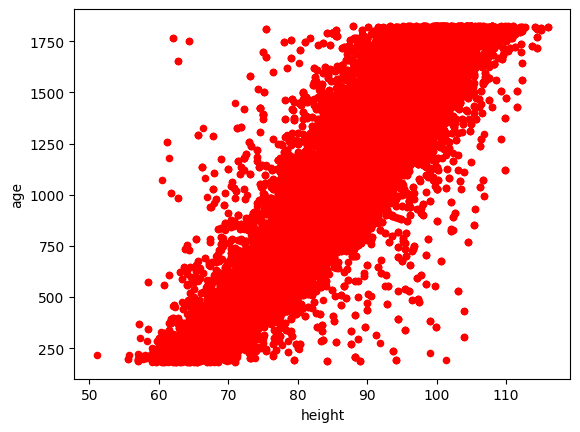

In [55]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')

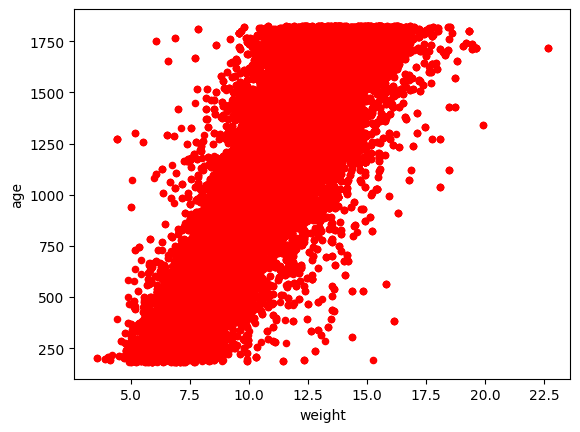

In [56]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

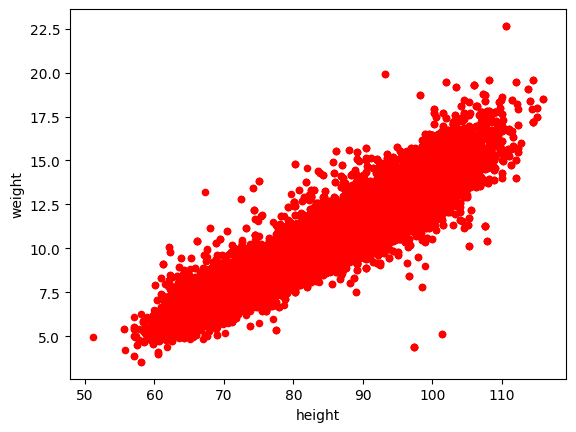

In [57]:
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

### Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [58]:
df_adjusted.describe()

,scan_step,height,weight,muac,age,order_number,no_of_person,angle,distance_to_child,depthmap_validity,overlap,Years
count,464150.000000,464150.000000,464150.000000,464150.000000,464150.000000,464150.000000,464150.000000,464150.000000,4.641500e+05,464150.000000,464150.000000,464150.000000
mean,109.783936,87.983198,11.169211,13.874463,1154.445755,10.288547,1.081913,-38.204347,3.417904e+15,0.875430,90.346050,2.632851
std,28.175550,10.347338,2.396504,1.010773,437.319871,7.624200,0.373828,16.753487,1.775190e+17,0.057686,15.654595,1.184738
min,100.000000,51.100000,3.550000,9.000000,183.000000,1.000000,1.000000,-89.958841,2.000000e-02,0.000000,0.000000,0.000000
25%,101.000000,80.600000,9.400000,13.200000,826.000000,4.000000,1.000000,-43.406882,4.800000e-01,0.846209,87.839825,2.000000
50%,101.000000,89.000000,11.250000,13.800000,1193.000000,8.000000,1.000000,-36.219829,5.920000e-01,0.877040,95.172414,3.000000
75%,102.000000,96.000000,12.850000,14.500000,1529.000000,16.000000,1.000000,-28.385850,7.000000e-01,0.908085,100.000000,4.000000
max,202.000000,116.000000,22.650000,18.700000,1825.000000,78.000000,13.000000,46.026557,9.223372e+18,1.000000,100.000000,5.000000


In [59]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,age,order_number,no_of_person,angle,distance_to_child,depthmap_validity,overlap,Years
count,35286.000000,35286.000000,35286.000000,35286.000000,35286.000000,35286.000000,35286.000000,35286.000000,3.528600e+04,35286.000000,35286.000000,35286.000000
mean,116.731508,86.522451,10.869061,13.811129,1093.025903,7.294111,1.090347,-40.631719,4.966391e+15,0.883891,89.754288,2.462280
std,36.341658,11.035925,2.511357,1.028205,464.046482,6.062402,0.382187,19.458596,2.139708e+17,0.058787,15.702469,1.267097
min,100.000000,51.100000,3.550000,9.000000,183.000000,1.000000,1.000000,-89.927133,2.200000e-02,0.000000,0.000000,0.000000
25%,101.000000,78.300000,8.950000,13.100000,715.000000,3.000000,1.000000,-45.226195,4.760000e-01,0.852042,86.975728,1.000000
50%,101.000000,87.500000,10.900000,13.800000,1129.000000,6.000000,1.000000,-36.571161,5.850000e-01,0.882721,94.290976,3.000000
75%,102.000000,95.300000,12.650000,14.500000,1492.000000,9.000000,1.000000,-28.632755,6.890000e-01,0.917473,100.000000,4.000000
max,202.000000,116.000000,22.650000,18.700000,1825.000000,65.000000,8.000000,46.026557,9.223372e+18,1.000000,100.000000,5.000000


### 1) Check age

In [60]:
find_outliers(df, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [61]:
find_outliers(df, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [62]:
find_outliers(df, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [63]:
weight_outliers = find_outliers(df, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 53


In [64]:
find_outliers(df, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

In [65]:
# weight_outliers : 53
# weights_df will have those 53 outliers related to weights "removed".
weights_df = df_adjusted[~df_adjusted['scan_id'].isin(weight_outliers)]

In [66]:
# Remove the duplicate scan_id's from the weights_df (the dataframe after removing weights outliers.)
unique_scan_ids_weights = weights_df.drop_duplicates(subset='scan_id', keep='first')

### These 2 plots to check if removing "weights" outliers impacts the "height vs age" relation

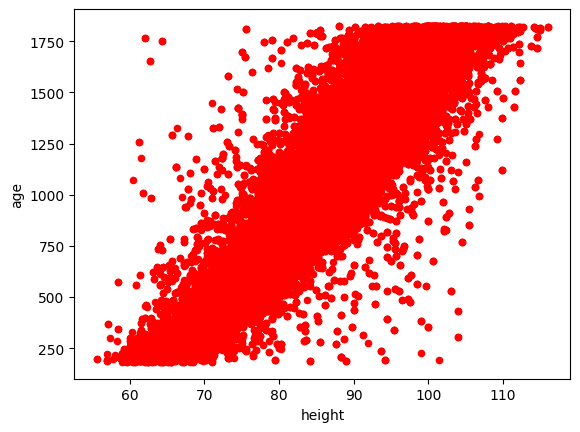

In [69]:
# plot after removing outliers weights
height_vs_age = unique_scan_ids_weights.plot.scatter(x='height', y='age', c='red')

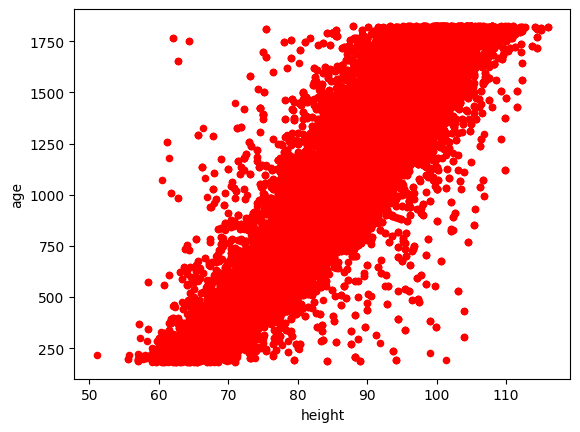

In [70]:
# initial plot
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')

#### The resulted plots (above 2) shows that weights outliers doesn't impact the "height vs age" trend

### This analysis is for "age" < 500 and "height" > 85
#### (df_adjusted['age']<500) *(df_adjusted['height'] > 85)

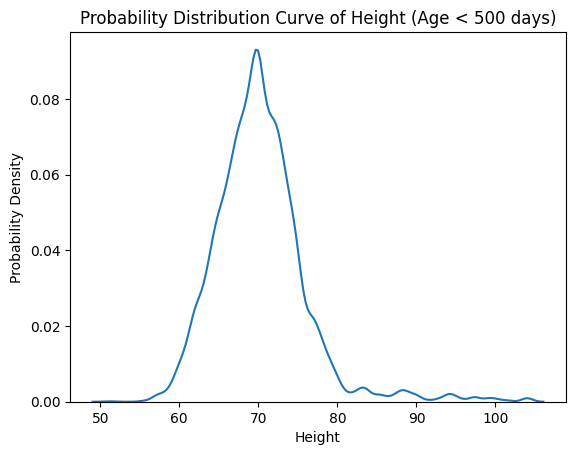

In [71]:
# find the scan_ids for which age < 500, pdf

age_500 = df_adjusted[df_adjusted['age'] < 500]
sns.kdeplot(data=age_500, x='height')

plt.title('Probability Distribution Curve of Height (Age < 500 days)')
plt.xlabel('Height')
plt.ylabel('Probability Density')

# Display the plot
plt.show()

In [72]:
# get the scan ids 
scan_ids_85 = df_adjusted[(df_adjusted['age']<500) *(df_adjusted['height'] > 85)]['scan_id']
len(scan_ids_85)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


1103

#### Create an empty DataFrame with "scan_id", "age", "sex" and "height" columns. We will use this to append the outliers scan_ids

In [73]:
required_cols = ['scan_id', 'age', 'sex', 'height']
final_scans  = pd.DataFrame(columns=required_cols)

In [74]:
# Filter the DataFrame for the given scan_ids list
filtered_df = df_adjusted[df_adjusted['scan_id'].isin(scan_ids_85)]

# Get the value counts of 'sex' column in the filtered DataFrame
sex_value_counts = filtered_df['sex'].value_counts()

# Display the value counts
print(sex_value_counts)

female    753
male      350
Name: sex, dtype: int64


In [75]:
# filtered_df[required_cols].shape
# filtered_df[required_cols]
final_scans = final_scans.append(filtered_df[required_cols])
final_scans.shape

(1103, 4)

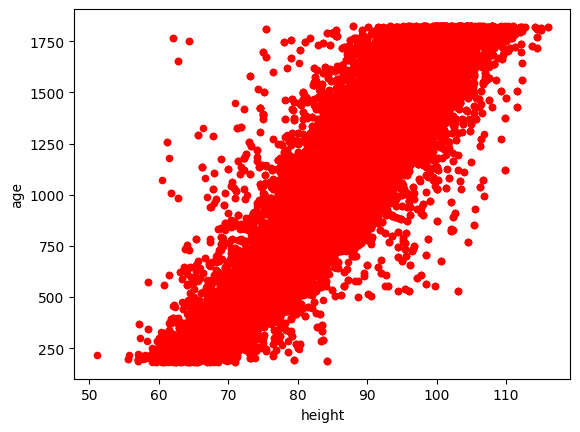

In [77]:
# plot of the above analysis
heights_85 = df_adjusted[~df_adjusted['scan_id'].isin(scan_ids_85)]
heights_85_scans = heights_85.drop_duplicates(subset='scan_id', keep='first')

height_vs_age = heights_85_scans.plot.scatter(x='height', y='age', c='red')

### Analysis for age > 1000 and height < 70
##### (df_adjusted['age']>1000) *(df_adjusted['height'] < 70)

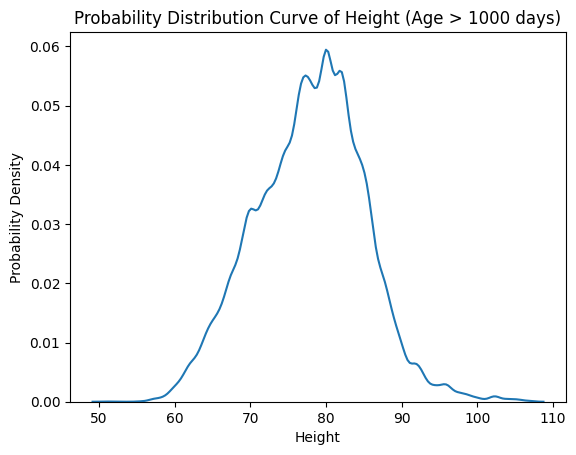

In [78]:
# find the scan_ids for which age > 1000, pdf

age_1000 = df_adjusted[df_adjusted['age'] < 1000]
sns.kdeplot(data=age_1000, x='height')

plt.title('Probability Distribution Curve of Height (Age > 1000 days)')
plt.xlabel('Height')
plt.ylabel('Probability Density')

# Display the plot
plt.show()

In [79]:
# get the scan ids 
scan_ids_80 = df_adjusted[(df_adjusted['age']>1000) *(df_adjusted['height'] < 70)]['scan_id']
len(scan_ids_80)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


337

In [80]:
# Filter the DataFrame for the given scan_ids list
filtered_df = df_adjusted[df_adjusted['scan_id'].isin(scan_ids_80)]

# Get the value counts of 'sex' column in the filtered DataFrame
sex_value_counts = filtered_df['sex'].value_counts()

# Display the value counts
print(sex_value_counts)

male      253
female     84
Name: sex, dtype: int64


In [81]:
# append these scans to the final_scans dataframe and remove the duplicate scan_ids.
final_scans = final_scans.append(filtered_df[required_cols])
# final_scans.shape
# final_scans.head()
# final_scans
final_scans_no_dups = final_scans.drop_duplicates(subset='scan_id', keep='first')
print(final_scans_no_dups.shape)
# save the dataframe to the csv file.
# final_scans_no_dups.to_csv('final_scans_list.csv')

(113, 4)


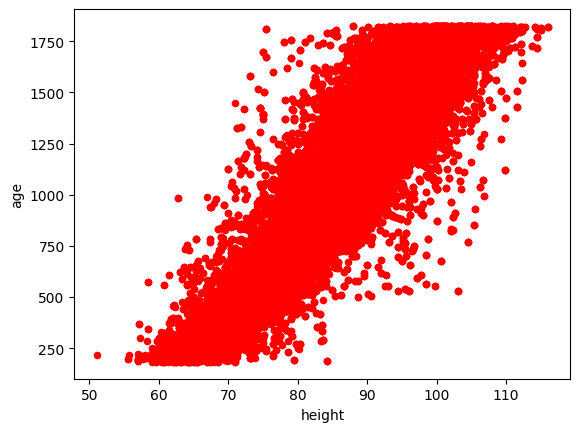

In [82]:
# Plot the above analysis (here we use heights_85 dataframe)
heights_80 = heights_85[~heights_85['scan_id'].isin(scan_ids_80)]
heights_80_scans = heights_80.drop_duplicates(subset='scan_id', keep='first')

height_vs_age = heights_80_scans.plot.scatter(x='height', y='age', c='red')

#### Analysis for "age" vs "height", bucketized for every 100 days of age.

In [83]:
# buckets of heights
bucket_size = 100
df_adjusted['bucket_id'] = (df_adjusted['age'] // bucket_size) * bucket_size

grouped_df_bucket = df_adjusted.groupby('bucket_id')['height'].agg(['mean', 'max', 'min']).reset_index()
grouped_df_bucket.columns = ['bucket_id', 'mean_height', 'max_height', 'min_height']

print(grouped_df_bucket)

    bucket_id  mean_height  max_height  min_height
0       100.0    65.996499       101.4        55.6
1       200.0    66.893886        99.0        51.1
2       300.0    70.356219       104.0        57.1
3       400.0    72.879614       104.0        62.1
4       500.0    75.505548       103.0        58.4
5       600.0    77.223012       100.6        61.4
6       700.0    79.981716       104.5        63.8
7       800.0    82.191155       105.4        68.5
8       900.0    84.491795       106.8        62.8
9      1000.0    86.334104       106.7        60.4
10     1100.0    88.273553       109.9        61.5
11     1200.0    90.691009       109.2        61.2
12     1300.0    92.622266       109.8        66.3
13     1400.0    93.975286       111.5        71.0
14     1500.0    95.913815       112.3        73.2
15     1600.0    97.477052       112.3        62.7
16     1700.0    99.761396       114.5        62.0
17     1800.0   101.695557       116.0        75.5


/tmp/ipykernel_3712799/3329579653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['bucket_id'] = (df_adjusted['age'] // bucket_size) * bucket_size


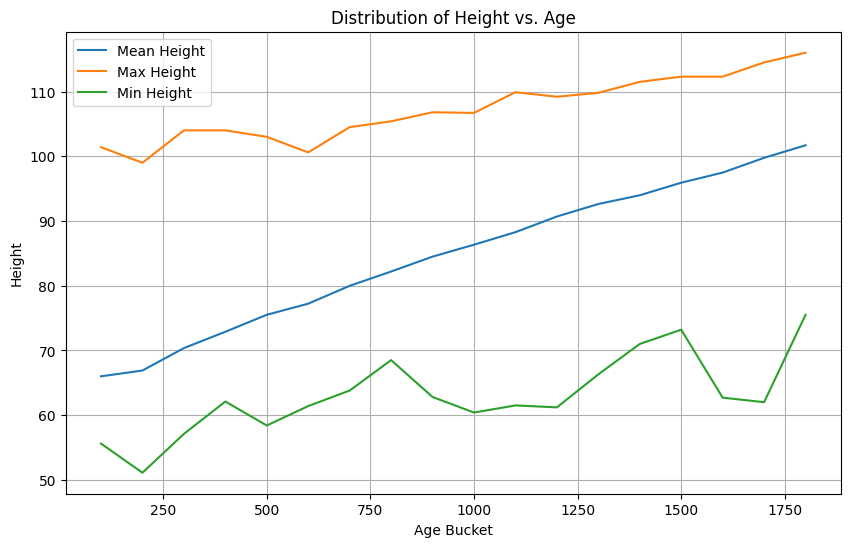

In [84]:

# Plot the mean, max, and min heights against age
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_bucket['bucket_id'], grouped_df_bucket['mean_height'], label='Mean Height')
plt.plot(grouped_df_bucket['bucket_id'], grouped_df_bucket['max_height'], label='Max Height')
plt.plot(grouped_df_bucket['bucket_id'], grouped_df_bucket['min_height'], label='Min Height')

plt.xlabel('Age Bucket')
plt.ylabel('Height')
plt.title('Distribution of Height vs. Age')
plt.legend()
plt.grid()
plt.show()

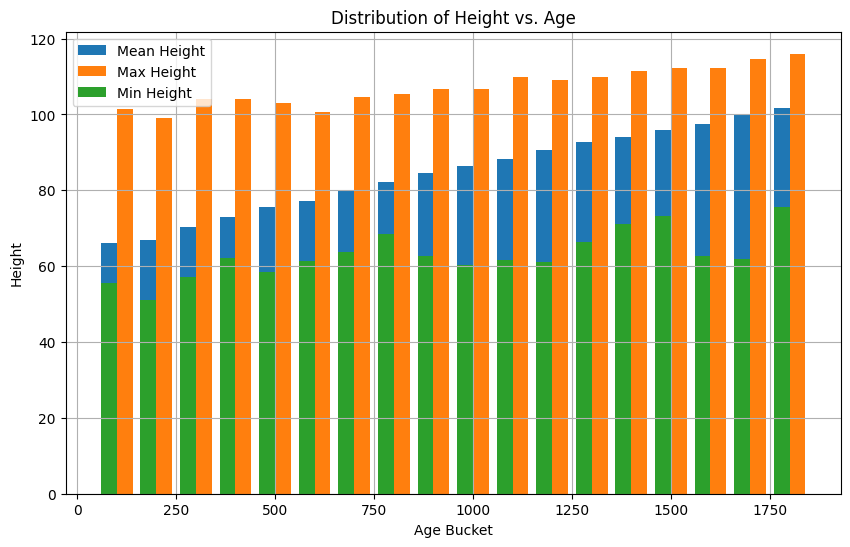

In [85]:
# Plot the mean, max, and min heights against age using bar plots
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_bucket['bucket_id'], grouped_df_bucket['mean_height'], width=80, label='Mean Height')
plt.bar(grouped_df_bucket['bucket_id'] + 20, grouped_df_bucket['max_height'], width=40, label='Max Height')
plt.bar(grouped_df_bucket['bucket_id'] - 20, grouped_df_bucket['min_height'], width=40, label='Min Height')

plt.xlabel('Age Bucket')
plt.ylabel('Height')
plt.title('Distribution of Height vs. Age')
plt.legend()
plt.grid()
plt.show()


In [86]:
# buckets of heights: using the same grouped_df_bucket.

# Get scan_id corresponding to max_height and min_height for each bucket
grouped_df_bucket['scan_id_max'] = df_adjusted.loc[df_adjusted.groupby('bucket_id')['height'].idxmax(), 'scan_id'].values
grouped_df_bucket['scan_id_min'] = df_adjusted.loc[df_adjusted.groupby('bucket_id')['height'].idxmin(), 'scan_id'].values

print(grouped_df_bucket)


    bucket_id  mean_height  max_height  min_height  \
0       100.0    65.996499       101.4        55.6   
1       200.0    66.893886        99.0        51.1   
2       300.0    70.356219       104.0        57.1   
3       400.0    72.879614       104.0        62.1   
4       500.0    75.505548       103.0        58.4   
5       600.0    77.223012       100.6        61.4   
6       700.0    79.981716       104.5        63.8   
7       800.0    82.191155       105.4        68.5   
8       900.0    84.491795       106.8        62.8   
9      1000.0    86.334104       106.7        60.4   
10     1100.0    88.273553       109.9        61.5   
11     1200.0    90.691009       109.2        61.2   
12     1300.0    92.622266       109.8        66.3   
13     1400.0    93.975286       111.5        71.0   
14     1500.0    95.913815       112.3        73.2   
15     1600.0    97.477052       112.3        62.7   
16     1700.0    99.761396       114.5        62.0   
17     1800.0   101.695557  

### Plot the above buckets to check "height" vs "age" trend

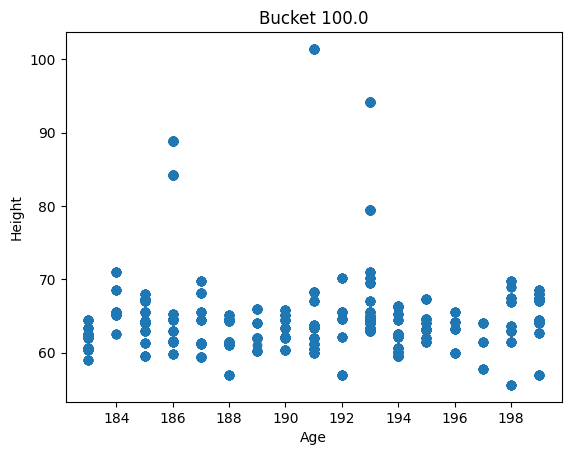

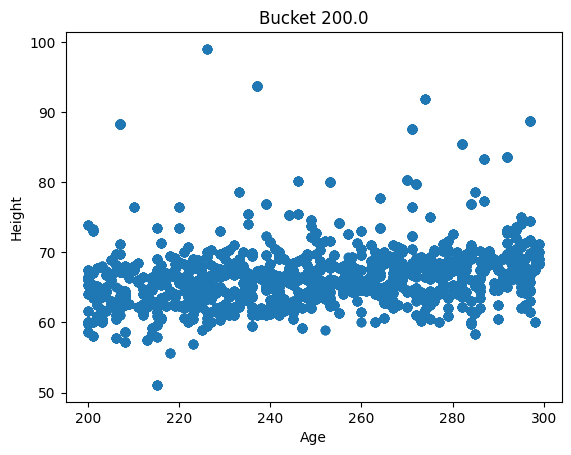

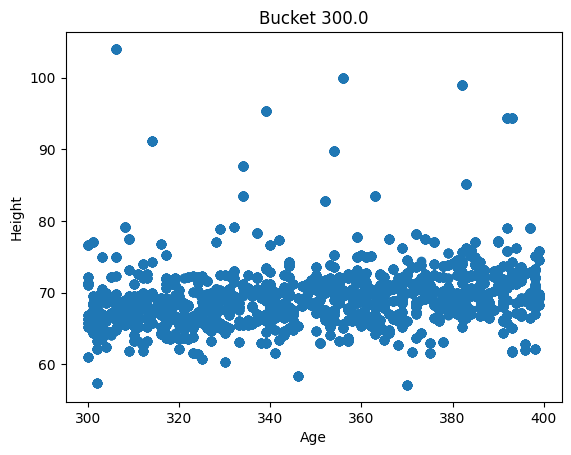

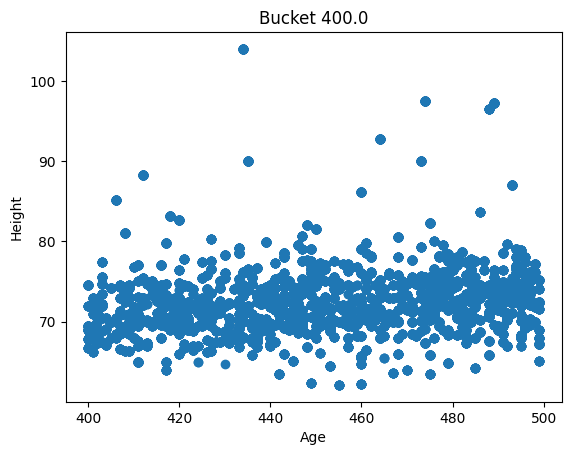

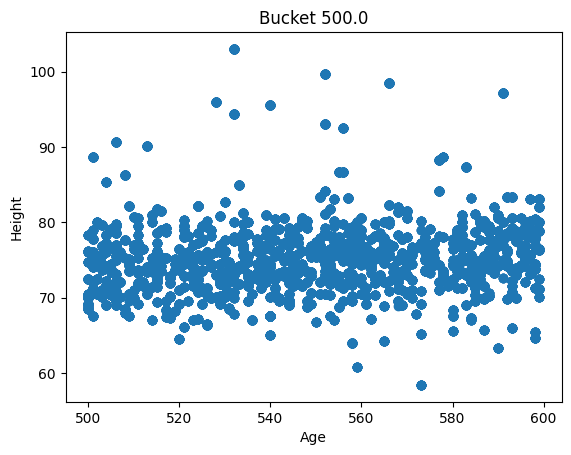

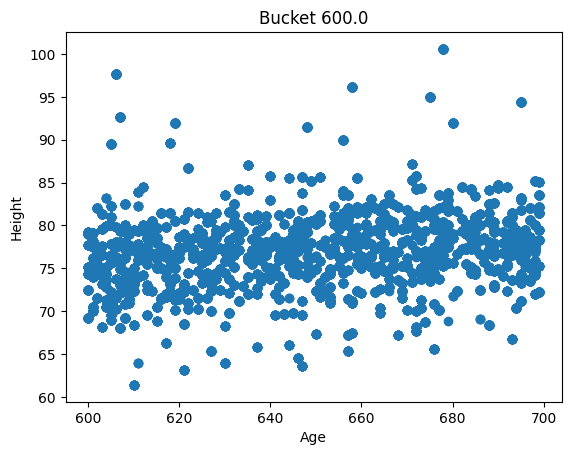

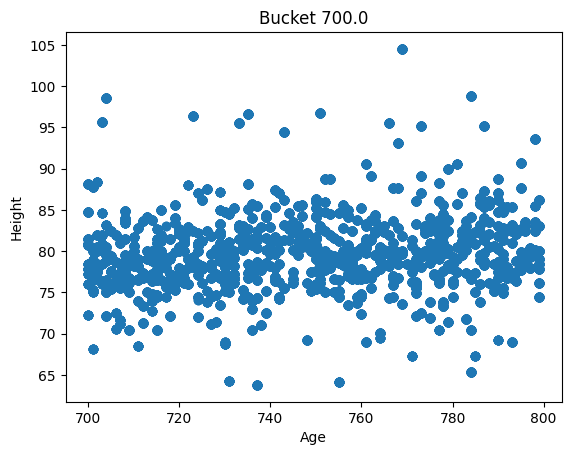

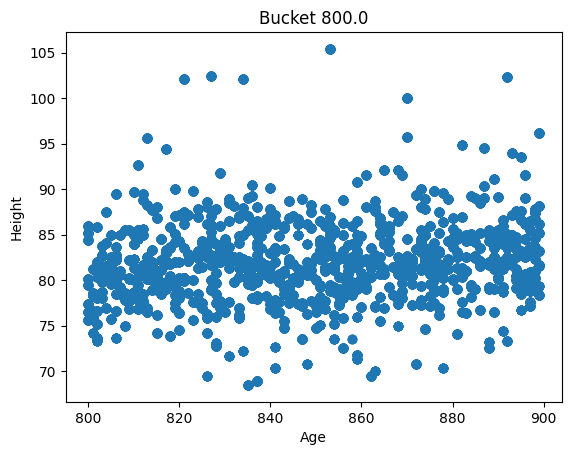

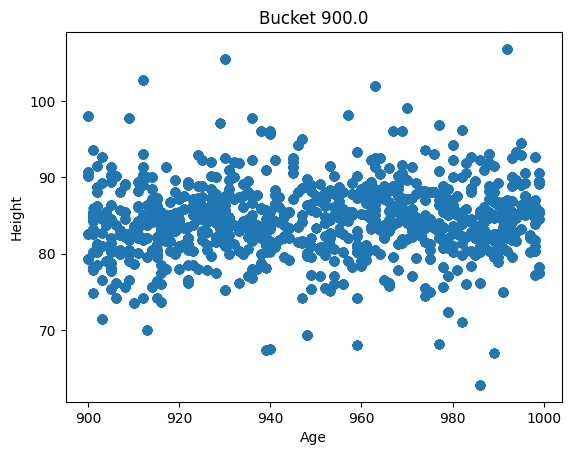

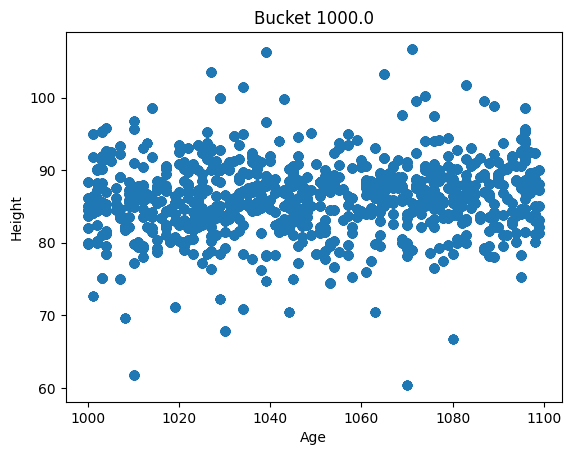

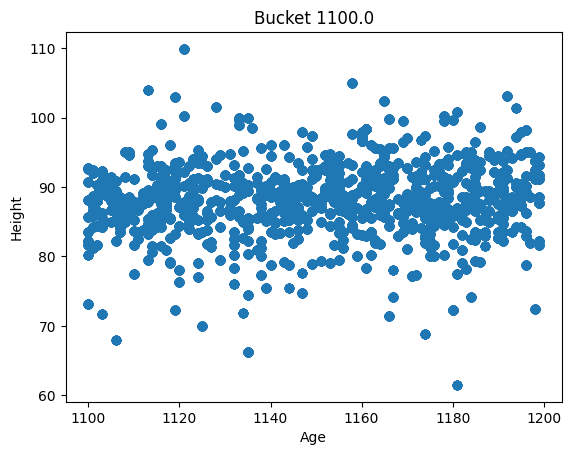

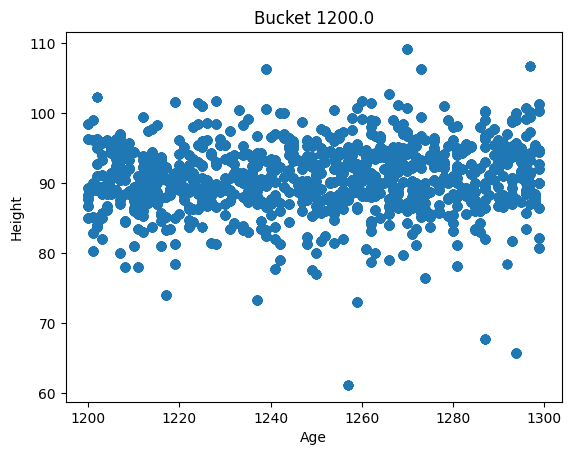

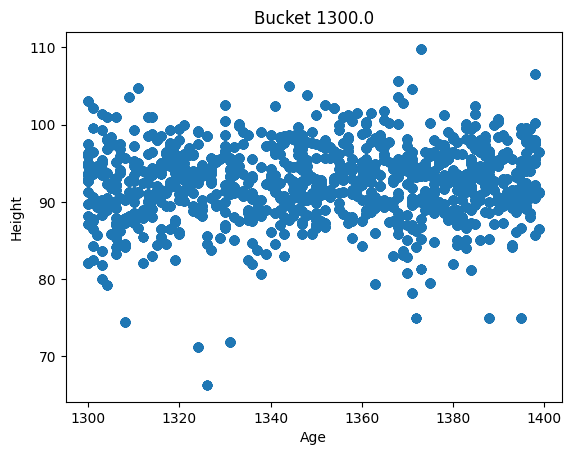

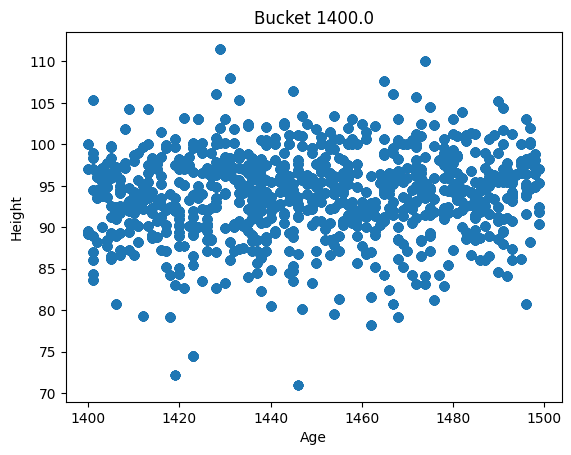

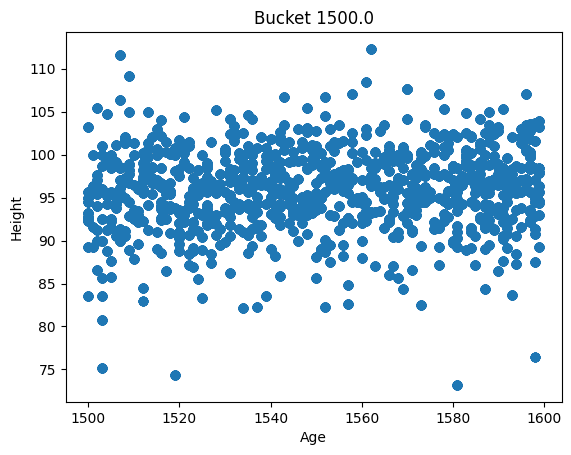

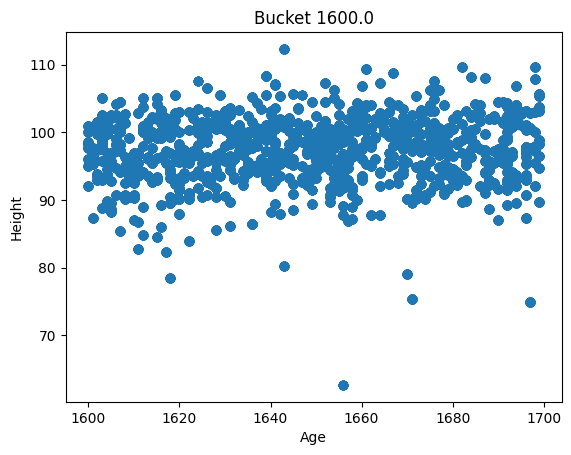

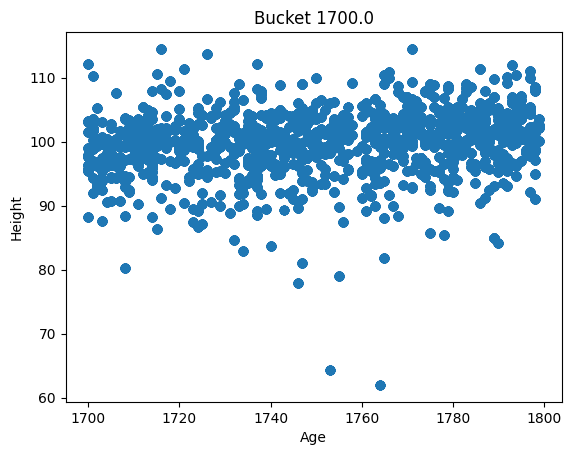

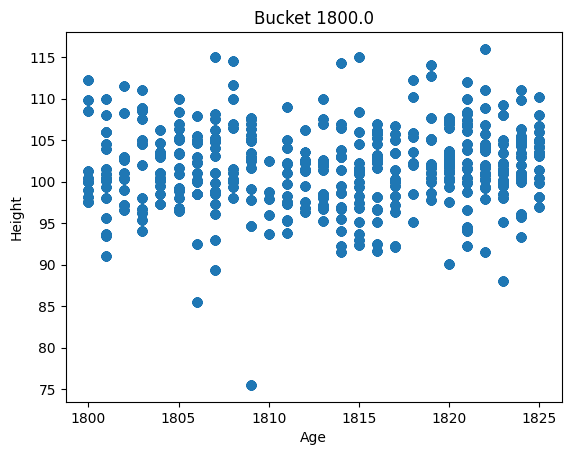

In [87]:
# Group the data by 'bucket_id'
grouped_data = df_adjusted.groupby('bucket_id')

# Loop through each group and plot height vs. age for each bucket
for group_name, group_data in grouped_data:
    bucket_height = group_data['height']
    bucket_age = group_data['age']

    # Create the plot
    plt.scatter(bucket_age, bucket_height)
    plt.xlabel('Age')
    plt.ylabel('Height')
    plt.title(f'Bucket {group_name}')

    # Show the plot for each bucket
    plt.show()


### 3) Check height

In [88]:
find_outliers(df, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [89]:
find_outliers(df, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]

In [90]:
mount_ctx.stop()